#### **1. Importando Pacote e módulos necessários**

Instalação dos módulos necessários.

In [ ]:
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib
%pip install aisp

In [ ]:
# Importando o Sistema Imunológico Artificial de Reconhecimento.
from aisp.csa import AIRS

# Importando os demais pacotes. 
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### 2. Gerando bolhas de dados para as classe aleatoriamente.

Utilizando a função make_blobs, são gerados dois conjuntos de dados em forma de bolhas, no intervalo entre 0 e 1, representando cada classe x e y. Em seguida, esses dados são separados em conjuntos de teste e treinamento.

In [2]:
# Gerando as amostras e saídas para o treinamento.
samples, output = make_blobs(n_samples=500 , cluster_std=0.07, center_box=([0.0, 1.0]), centers=[[0.25, 0.75], [0.75, 0.25]], random_state=1234) 
# Separando dados para treinamento e teste.
train_x, test_x, train_y, test_y = train_test_split(samples, output, test_size=0.2)

#### 3. Testando o modelo `AIRS`:
Em seguida, apresenta o resultado da acurácia da previsão.

In [3]:
# Iniciando a classe.
airs = AIRS(seed=1234)
# Efetuando o treinamento: 
airs.fit(X=train_x, y=train_y)
# Efetuando a previsão:: 
prev = airs.predict(X=test_x)
# Mostrando a acurácia das previsões para os dados.
print(f"A acurácia é {accuracy_score(prev, test_y)}")
print(classification_report(test_y, prev))

✔ Set of memory cells for classes (0, 1) successfully generated:  ┇██████████┇ 400/400 memory cells for each ai


A acurácia é 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        43

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



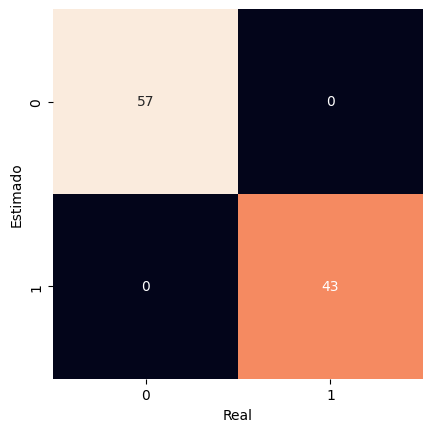

In [4]:
# Gerando a matriz de confusão e plotando de forma gráfica.
mat = confusion_matrix(y_true=test_y, y_pred=prev)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=airs.classes, yticklabels=airs.classes)
plt.xlabel('Real')
plt.ylabel('Estimado')
plt.show()

#### 4. Plotando as células de memória gerados e as amostras de treinamento.

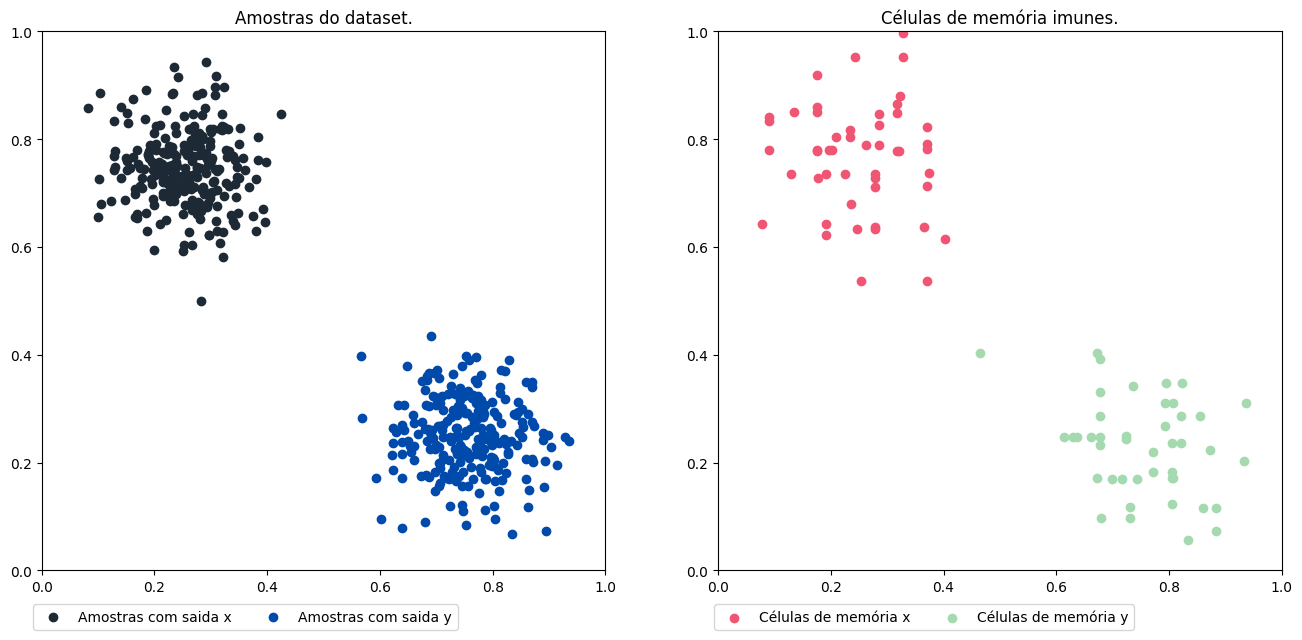

In [5]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16, 7))
labels = ['x', 'y']
classesIndex = np.array((np.nonzero(output == 0)[0] ,np.nonzero(output == 1)[0]))

for i in range(2):
    ax[i].axis([0, 1,0,1])
    if i == 1:
        x = [cell.vector.tolist() for cell in airs.cells_memory[0]]
        y = [cell.vector.tolist() for cell in airs.cells_memory[1]]
        ax[i].scatter([point[0] for point in x], [point[1] for point in x], label='Células de memória x', color='#f05674')
        ax[i].scatter([point[0] for point in y], [point[1] for point in y], label='Células de memória y', color='#a5dab1')
        ax[i].set_title('Células de memória imunes.')
    else: 
        ax[i].scatter(samples[classesIndex[0], 0], samples[classesIndex[0], 1], label='Amostras com saida x', color='#1d2a35')
        ax[i].scatter(samples[classesIndex[1], 0], samples[classesIndex[1], 1], label='Amostras com saida y', color='#004aab')
        ax[i].set_title('Amostras do dataset.')


ax[1].legend(bbox_to_anchor=(0.75, -0.05), ncol=2)
ax[0].legend(bbox_to_anchor=(0.75, -0.05), ncol=2)

plt.show()
